# 第二回

## 情報エントロピーの計算

① ６つの目があるサイコロを振る。各目の出る確率は次の通り。
<pre>
1: 1/6
2: 1/6
3: 1/6
4: 1/6
5: 1/6
6: 1/6
</pre>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

P1 = 1/6
P2 = 1/6 
P3 = 1/6
P4 = 1/6 
P5 = 1/6
P6 = 1/6 

# エントロピー
H = -P1 * np.log2(P1) -P2 * np.log2(P2)-P3 * np.log2(P3)-P4 * np.log2(P4)-P5 * np.log2(P5)-P6 * np.log2(P6)

print(H)

2.584962500721156


② ６つの目があるサイコロを振る。各目の出る確率は次の通り。
<pre>
1: 1/3
2: 1/12
3: 1/12
4: 1/12
5: 1/12
6: 1/3
</pre>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

P1 = 1/3
P2 = 1/12 
P3 = 1/12
P4 = 1/12
P5 = 1/12
P6 = 1/3

# エントロピー
H = -P1 * np.log2(P1) -P2 * np.log2(P2)-P3 * np.log2(P3)-P4 * np.log2(P4)-P5 * np.log2(P5)-P6 * np.log2(P6)

print(H)

2.251629167387823


注: ①のエントロピー 2.584962500721156 > ②のエントロピー 2.251629167387823

## 確率分布と温度

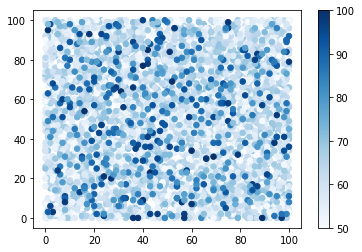

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
    
value =[]
x = []
y = []

N1 = 5000
for i in range(N1):
    value.append(random.randint(50, 70))
    x.append(random.randint(0, 100))
    y.append(random.randint(0, 100))

N2 = 500
for i in range(N2):
    value.append(random.randint(70, 100))
    x.append(random.randint(0, 100))
    y.append(random.randint(0, 100))
    
plt.scatter(x, y, s=30, c=value, cmap='Blues')

plt.colorbar()

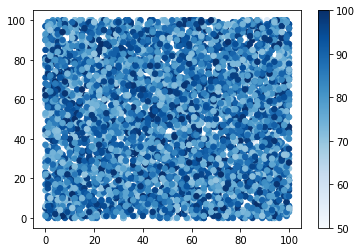

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
    
value =[]
x = []
y = []

N1 = 500
for i in range(N1):
    value.append(random.randint(50, 70))
    x.append(random.randint(0, 100))
    y.append(random.randint(0, 100))

N2 = 5000
for i in range(N2):
    value.append(random.randint(70, 100))
    x.append(random.randint(0, 100))
    y.append(random.randint(0, 100))
    
plt.scatter(x, y, s=30, c=value, cmap='Blues')

plt.colorbar()

<IPython.core.display.Javascript object>


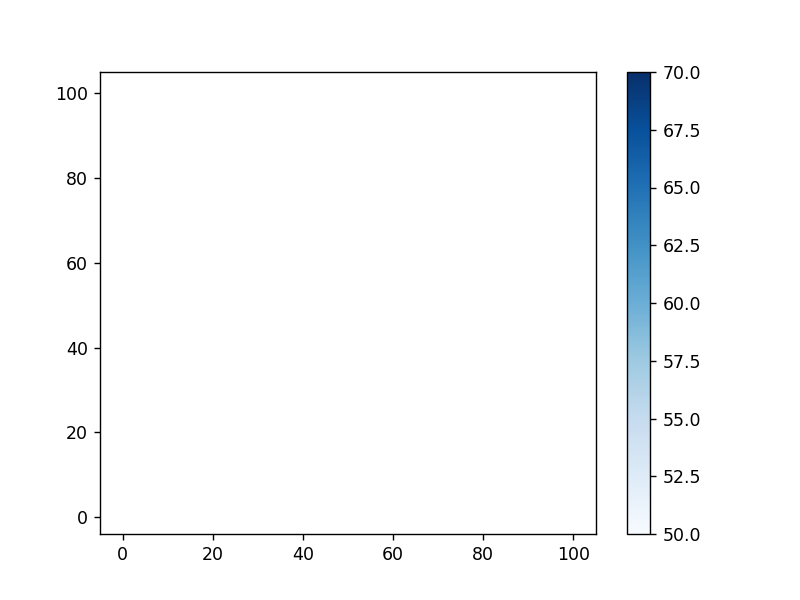

In [9]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation

fig = plt.figure()


value =[]
x = []
y = []
ims = []

N1 = 100
for i in range(N1):
    value.append(random.randint(50, 70))
    x.append(random.randint(0, 100))
    y.append(random.randint(0, 100))
    im = plt.scatter(x, y, s=80, c=value, cmap='Blues')
    ims.append([im])
    
#N2 = 500
#for i in range(N2):
#    value.append(random.randint(70, 100))
#    x.append(random.randint(0, 100))
#    y.append(random.randint(0, 100))
    
ani = animation.ArtistAnimation(fig, ims, interval=150)
plt.colorbar()
#plt.show()
#ani.save('sample.gif', writer="imagemagick")

<img src="./sample.gif">

## 参考：確率分布 ボルツマン分布

<IPython.core.display.Javascript object>


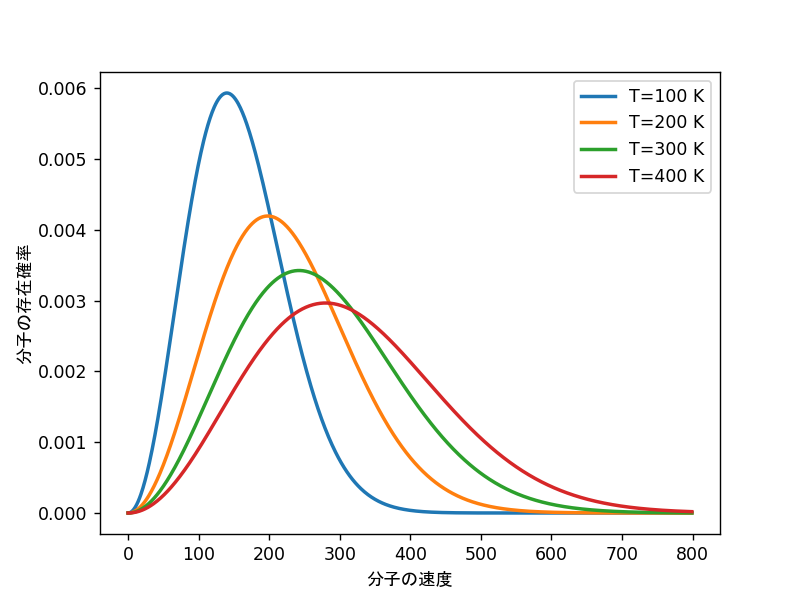

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def MB_speed(v,m,T):
    """ Maxwell-Boltzmann speed distribution for speeds """
    kB = 1.38e-23
    return (m/(2*np.pi*kB*T))**1.5 * 4*np.pi * v**2 * np.exp(-m*v**2/(2*kB*T))

fig = plt.figure()
ax = fig.add_subplot(111)

v = np.arange(0,800,1)
amu = 1.66e-27
mass = 85*amu

for T in [100,200,300,400]:
    fv = MB_speed(v,mass,T)
    ax.plot(v,fv,label='T='+str(T)+' K',lw=2)

ax.legend(loc=0)
ax.set_xlabel('分子の速度', fontname="MS Gothic")
ax.set_ylabel('分子の存在確率', fontname="MS Gothic")
plt.draw()

## 条件付き確率：モンティ・ホール問題

In [10]:
import random

# 始めに、ドアの数を決める
NUM_DOORS = 3

def monty(change):
    i = 0
    doors =[]
    
    # 初期化
    for i in range(100):
        doors.append(0)
    
    # 当たり(1)のドアを決める
    doors[random.randint(0, 100) % NUM_DOORS] = 1
    
    # ドアを選ぶ
    myChoice = random.randint(0, 100) % NUM_DOORS
    
    # 外れ(0)のドアを開ける
    for i in range(NUM_DOORS):
        if doors[i] == 0 and i != myChoice:
            doors[i] = -1
            break
            
    # 扉を変更する時        
    if change == 1:
            for i in range(NUM_DOORS):
                if doors[i] != -1 and i != myChoice:
                    myChoice = i
                    break
            
    # print(doors[myChoice])
            
    # 当たった場合    
    if doors[myChoice] == 1:
        result = 1
        
    # 外れた場合
    if doors[myChoice] != 1:
        result = 0
    
    return result

# ドアを変更しない: monty(0)
counter = 0
for i in range(10000):
    if(monty(0)==1):
        counter = counter + 1

print("変更しなかった時の勝率: " + str(counter/10000))
        
# ドアを変更する: monty(1)
counter = 0
for i in range(10000):
    if(monty(1)==1):
        counter = counter + 1

print("変更したときの勝率: " + str(counter/10000))
        

変更しなかった時の勝率: 0.3369
変更したときの勝率: 0.6661
